Accuracy on test set: 0.9912280701754386


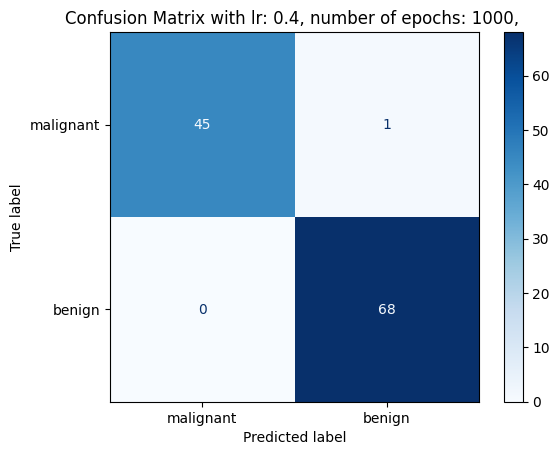

In [ ]:
## https://gpt.uio.no/chat/810796
import autograd.numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import FFNN as fn
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt 

np.random.seed(666) #random seed to ensure reproducibility

# Load and preprocess the Wisconsin Breast Cancer dataset
data = datasets.load_breast_cancer()
X = data.data
y = data.target
y = y.reshape(-1, 1)

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024) 

input_size = X_train.shape[1]
output_layer = [1] # the output layer

# Tuning the parameters:
hidden_layers = [20, 20] # a list of hidden layers
layers = fn.create_layers_batch(input_size, hidden_layers+output_layer)
activation_funcs = [fn.ReLU, fn.ReLU, fn.sigmoid]
activation_ders = [fn.ReLU_der, fn.ReLU_der, fn.sigmoid_der]
learning_rate = 0.4
epochs = 1000

# Training loop
for epoch in range(epochs):
    grads =fn.backpropagation_batch(X_train, layers, activation_funcs, y_train, activation_ders)
    for i, (W, b) in enumerate(layers):
        dW, db = grads[i]
        W -= learning_rate * dW
        b -= learning_rate * db
        layers[i] = (W, b)
    
    if epoch % 100 == 0:
        cost_value = fn.cost_batch(layers, X_train, activation_funcs, y_train)
        #print(f"Epoch {epoch}, cost: {cost_value}")

# Evaluate the model
prediction = fn.feed_forward_batch(X_test, layers, activation_funcs)
prediction = np.round(prediction) 
accuracy = accuracy_score(y_test, prediction) 
print(f"Accuracy on test set: {accuracy}")


conf_matrix = confusion_matrix(y_test, prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=data.target_names)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix with lr: %s, number of epochs: %s, " %(learning_rate, epochs))
plt.show()

In [ ]:
#alternative code for confusion matrix (will print instead of giving an image):
falseP = 0
trueP = 0
falseN = 0
trueN = 0
other = 0

for i in range(prediction.size):
    pred = prediction[i][0]
    sol = y_test[i][0]
    if pred==1 and sol==0 :
        falseP += 1
    elif pred==1 and sol==1:
        trueP +=1
    elif pred==0 and sol==1:
        falseN +=1
    elif pred==0 and sol==0:
        trueN +=1
    else:
        other+=1
        print("pred: ", pred)

print("False benign: ", falseP )
print("True benign: ", trueP)
print("False malignant: ", falseN )
print("True malignant: ", trueN)
print("other: ", other)

False benign:  1
True benign:  68
False malignant:  0
True malignant:  45
other:  0
